# 1  A small note on duplicates in automated data cleaning for chest Xrays with cleanX: notebook for medical professionals with limited coding abililties.

CleanX is a code library by Candace Makeda Moore, MD, Oleg Sivokon, and Andrew Murphy. Please note this workflow does not cover the whole scope of cleanX, and is only meant to show some of the functionality that can be accomplished using cleanX. 

The purpose of this notebook is to be a small note about duplicated imahes. 

In [1]:
import sys
sys.path = ['D:/projects/cleanX'] + sys.path
# we will need to import some libraries
import pandas as pd
import os
from cleanX import (
    dataset_processing as csvp,
    dicom_processing as dicomp,
    image_work as iwork,
)

In [2]:
origin_folder ='D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'

## A word on finding duplicates
We may or may not want to use duplicated images to build an algorithm. Generally, it's a bad idea. At the extreme, if all of one pathology is simply duplicated images, we do not have enough data. Instead of trying to remember if we see duplicates in thousands of images, let's ask cleanX. cleanX compares the images pixel by pixel, and this takes time if you don't have a powerful computer, but it doesn't take human time. We can take a much needed break! 

In [3]:
found = iwork.find_duplicated_images_todf(origin_folder)
len(found[found.status == 'duplicated'])  

26

OK, so we may have 26 duplicates. Not so bad out of thousands of pictures. Let's pull up a list so we can check them by hand.

In [4]:
found[found.status == 'duplicated']

,images,status
5287,NORMAL2-IM-0587-0001-0002.jpeg,duplicated
5288,person1159_virus_1945.jpeg,duplicated
5289,person124_virus_247.jpeg,duplicated
5290,person1261_virus_2148.jpeg,duplicated
5291,person1312_bacteria_3318.jpeg,duplicated
5292,person1343_bacteria_3414.jpeg,duplicated
5293,person1349_bacteria_3437.jpeg,duplicated
5294,person1372_bacteria_3502.jpeg,duplicated
5295,person1372_bacteria_3503.jpeg,duplicated
5296,person1430_bacteria_3696.jpeg,duplicated


In [5]:
wierd_images = found[found.status == 'duplicated']
wierd_images_list = wierd_images.images.to_list()

# we need the full file path
final_names = []
for image_string in wierd_images_list:
    final_names.append(os.path.join(origin_folder, image_string))

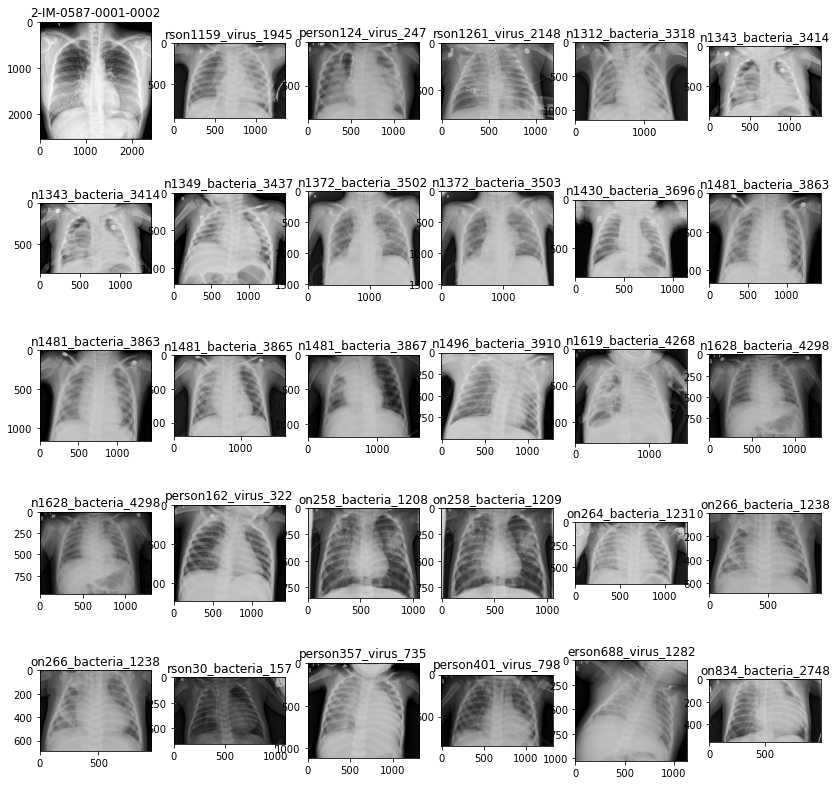

In [6]:
iwork.show_images_in_df(final_names,19)

Interesting, some of our duplicated pictures appear to have been triplicated, and we get two of the same duplicate. But there is a much nicer way to look and see what is going on.

## Let's look a different way

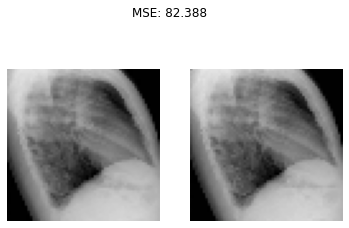

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\D5ACAA93-C779-4E22-ADFA-6A220489F840.jpeg


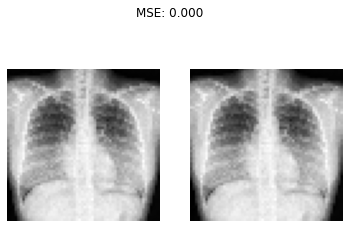

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\NORMAL2-IM-0587-0001-0001.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\NORMAL2-IM-0587-0001-0002.jpeg


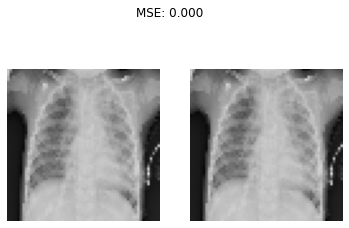

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1159_virus_1944.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1159_virus_1945.jpeg


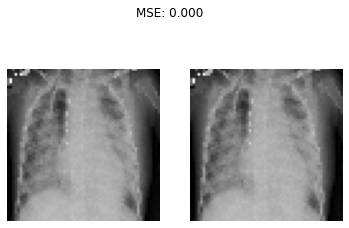

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person124_virus_246.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person124_virus_247.jpeg


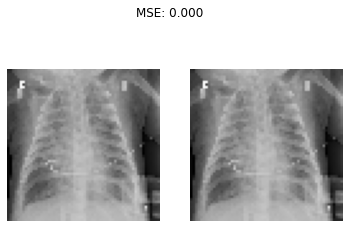

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1261_virus_2147.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1261_virus_2148.jpeg


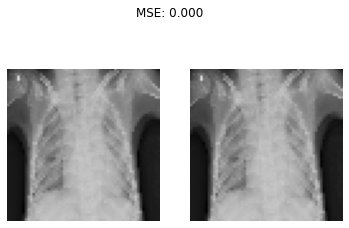

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1312_bacteria_3317.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1312_bacteria_3318.jpeg


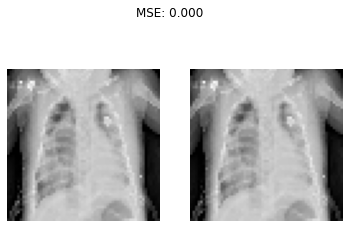

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1343_bacteria_3413.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1343_bacteria_3414.jpeg


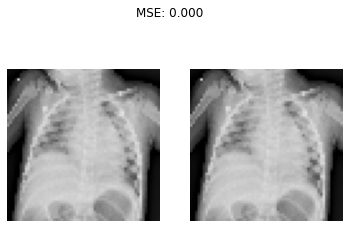

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1349_bacteria_3436.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1349_bacteria_3437.jpeg


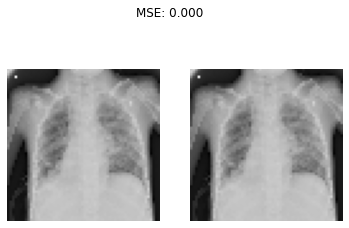

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1372_bacteria_3501.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1372_bacteria_3502.jpeg


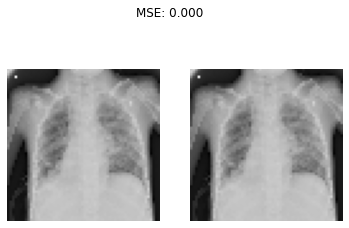

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1372_bacteria_3501.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1372_bacteria_3503.jpeg


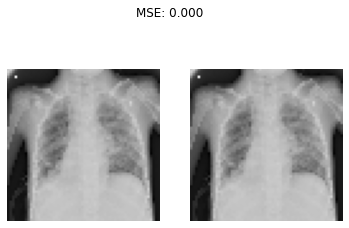

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1372_bacteria_3502.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1372_bacteria_3503.jpeg


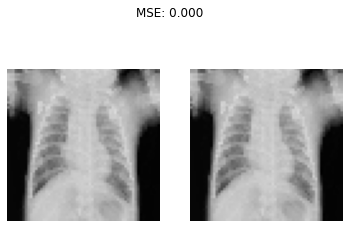

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1430_bacteria_3695.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1430_bacteria_3696.jpeg


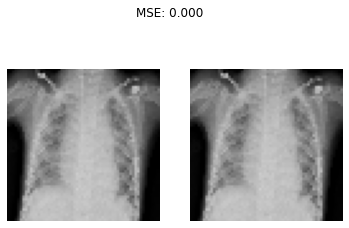

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1481_bacteria_3862.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1481_bacteria_3863.jpeg


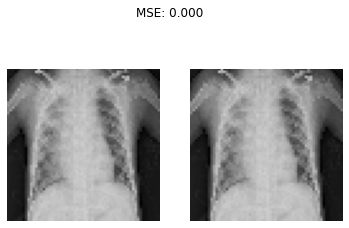

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1481_bacteria_3864.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1481_bacteria_3865.jpeg


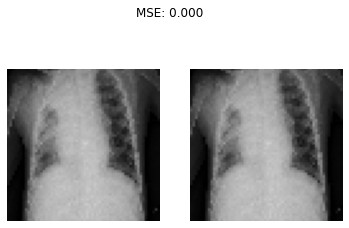

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1481_bacteria_3866.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1481_bacteria_3867.jpeg


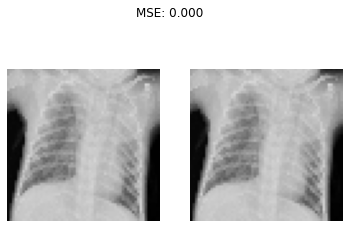

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1496_bacteria_3909.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1496_bacteria_3910.jpeg


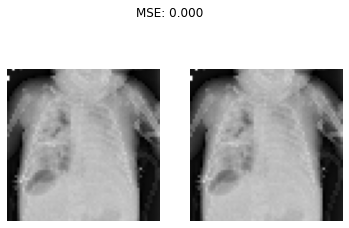

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1619_bacteria_4267.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1619_bacteria_4268.jpeg


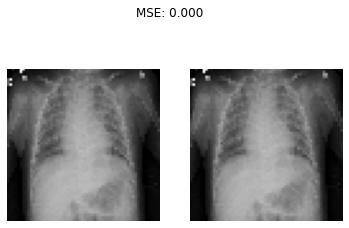

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1628_bacteria_4297.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person1628_bacteria_4298.jpeg


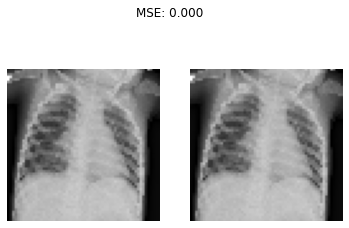

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person162_virus_321.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person162_virus_322.jpeg


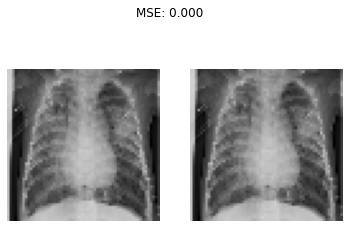

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person258_bacteria_1207.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person258_bacteria_1208.jpeg


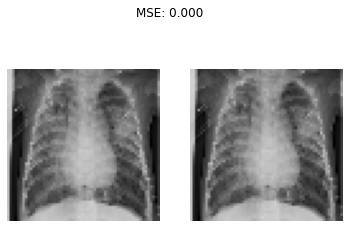

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person258_bacteria_1207.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person258_bacteria_1209.jpeg


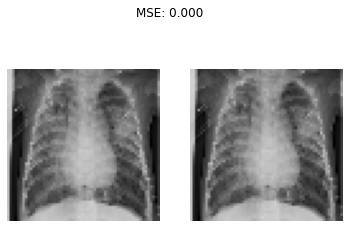

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person258_bacteria_1208.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person258_bacteria_1209.jpeg


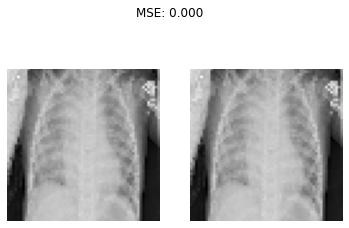

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person264_bacteria_1230.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person264_bacteria_1231.jpeg


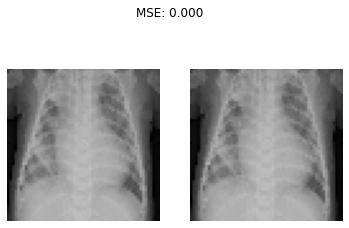

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person266_bacteria_1237.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person266_bacteria_1238.jpeg


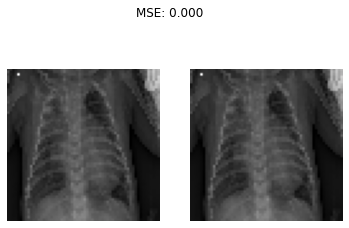

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person30_bacteria_156.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person30_bacteria_157.jpeg


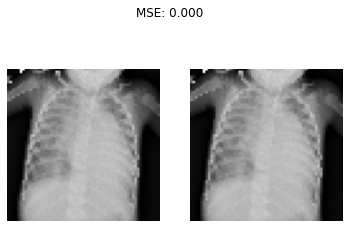

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person357_virus_734.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person357_virus_735.jpeg


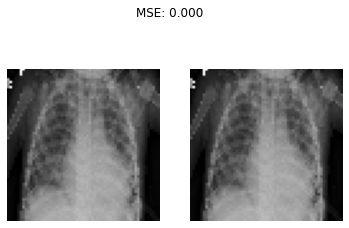

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person401_virus_797.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person401_virus_798.jpeg


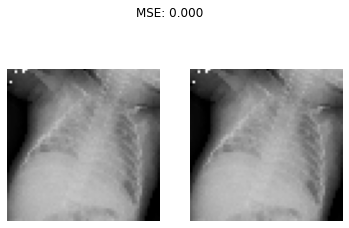

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person688_virus_1281.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person688_virus_1282.jpeg


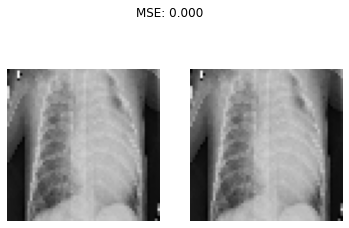

Similar files:  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person834_bacteria_2747.jpeg  and  D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\person834_bacteria_2748.jpeg

***
 Output:  29  potential duplicate image pairs in  5301  total images.
 At compression level 60 and mse 190


In [7]:
alt_found = iwork.show_close_images(origin_folder,60,190)
# by the way, another good time for cofee, this could take half an hour easily 

In [8]:
alt_found 

,twinA?,twinB?,mse
0,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,82.388333
1,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,0.000000
2,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,0.000000
3,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,0.000000
4,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,0.000000
5,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,0.000000
6,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,0.000000
7,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,0.000000
8,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,0.000000
9,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,D:/my_academia/ncs/Coronahack-Chest-XRay-Datas...,0.000000


That's how I like it. The function show_close_images gives me much more info
and is adjustable. We can actually see the triplicates (in this case 'person1372_bacteria_3501.jpeg', 'person1372_bacteria_3502.jpeg' and 'person1372_bacteria_3503.jpeg' ) But use whatever function you want! Notice near images which are not exactly the same should probably be sought before we start augmenting images.